In [56]:
import pickle
with open("data_lemmetized.txt",'rb')as f:
    data_l = pickle.load(f)
    f.close()

In [75]:
data_l

KeyboardInterrupt: 

In [57]:
type(data_l)

list

In [58]:
len(data_l)

3319

In [59]:
data_l[0].count('chatbot')

0

In [60]:
d = {}
for ind, text in enumerate(data_l):
    ct_ch = text.count('chatbot')
    ct_d1 = text.count('dialog')
    ct_d = text.count('dialogu')
    ct_ai = text.count('artifici_intellig')
    d[ind] = {'Chatbot':ct_ch+ct_d1+ct_d,
              'd':ct_d+ct_d1,
             'AI':ct_ai}

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 15})
%matplotlib inline

In [62]:
cdf = pd.DataFrame(d).T

In [63]:
alldf = pd.read_csv('insuretech_newspaper_wo_health_yr_mnth.csv')

In [64]:
alldf.columns

Index(['date', 'filepath', 'newsname', 'number', 'text', 'whole', 'yr_mnth',
       'year', 'month'],
      dtype='object')

In [65]:
cdf['yr_mnth'] = alldf['yr_mnth']

In [66]:
gr = cdf.groupby('yr_mnth').sum()

In [67]:
gr.columns

Index(['AI', 'Chatbot', 'd'], dtype='object')

In [68]:
gr1 = gr[(gr.index>'2016-12' )&('2018-07'> gr.index)]

[None, None, None, None]

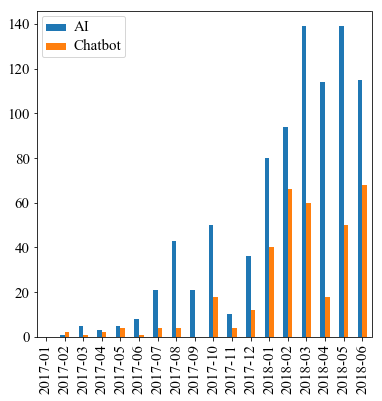

In [70]:
#ig, ax4 =plt.subplots()
ax = gr1[['AI','Chatbot']].plot(kind ='bar',figsize = (6,6), fontsize = 15)
ax.set_xlabel('')
plt.setp(ax.get_legend().get_texts(), fontsize='15')


#gr['chatbot'].plot.bar(color='blue')
#gr['ct_ai'].plot.bar(color='red')
#gr.plot(y=["chatbot", "ct_ai"], kind="bar")
# for key, data in cdf.groupby('yr_mnth'):
#     #data.plot(x='yr_mnth', y='prevalence', ax=ax, label=key)
    
#     ax4 = data.plot(x='yr_mnth', y='chatbot', ax = ax4)
#               #label=key, color = cm_skip[key], figsize = (8,8))
#     #ax4.set_ylim(0,0.8)
#     #ax3.set_xlim(-0.5,0.5)
#     ax4.set_facecolor("white")
#     ax4.spines['left'].set_visible(False)
#     ax4.spines['right'].set_visible(False)
#     ax4.spines['top'].set_visible(False)
#     #ax2.set_ylim(0,250)
#     #ax4.set_xlabel('')
#     #plt.xticks(xi)
#     #plt.xticks(data['year'])
#     #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
#     #           labels=mylabels,frameon=False)
#     #name = str(i+1) +'pv_by_p'
#     plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#     #plt.savefig('Figures/'+'90-97.png', dpi=800,facecolor='w',bbox_inches='tight')    
#     #plt.close()

In [55]:
lda = gensim.models.ldamodel.LdaModel.load('ldamodel_tri2.model')

In [58]:
## topic-words vectors: topics vs. words
from sklearn.feature_extraction import DictVectorizer
n_topics = 10
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in range(n_topics):
        temp = lda.show_topic(i, n_words)
        row = dict(((i[1],i[0]) for i in temp))
        rows.append(row)

    return rows    

vec = DictVectorizer()

X = vec.fit_transform(topics_to_vectorspace(n_topics))
X.shape
# (40, 2457)

(10, 1000)

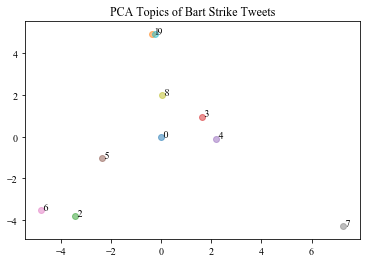

In [60]:
## PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit(X.toarray()).transform(X.toarray())

plt.figure()
for i in range(X_pca.shape[0]):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    

plt.title('PCA Topics of Bart Strike Tweets')
#plt.savefig("pca_topic")

#plt.close()

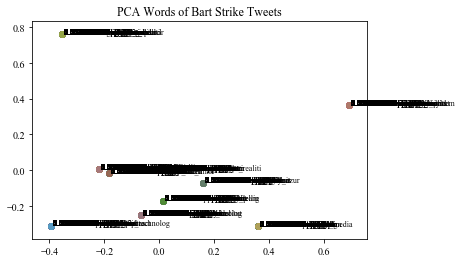

In [61]:
X_pca = pca.fit(X.T.toarray()).transform(X.T.toarray())

plt.figure()
for i, n in enumerate(vec.get_feature_names()):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + n, fontsize=8)
    
plt.title('PCA Words of Bart Strike Tweets')

#plt.savefig("pca_words")


#plt.close()

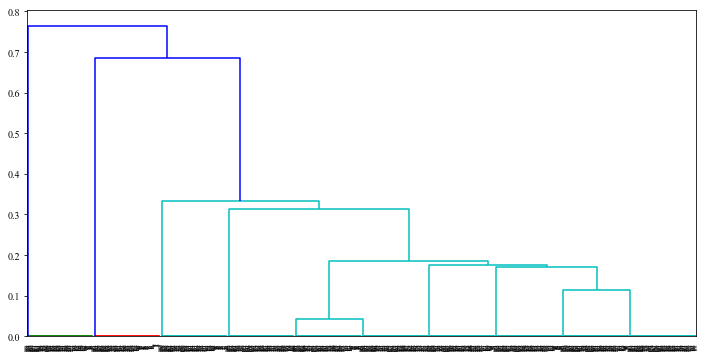

In [62]:
## hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(12,6))
R = dendrogram(linkage(X_pca))
#plt.savefig("dendro")

#plt.close()

/Users/misun/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


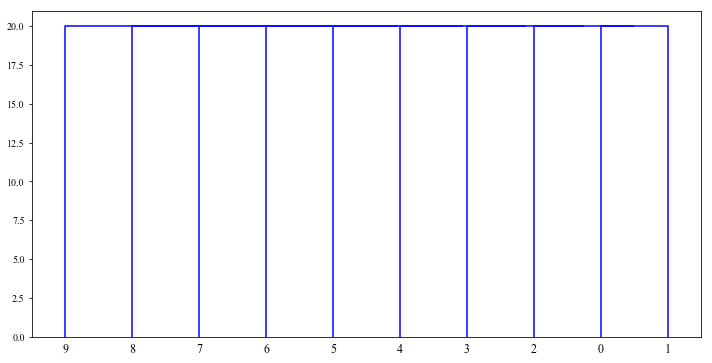

In [63]:
## correlation matrix
from scipy.spatial.distance import pdist, squareform

cor = squareform(pdist(X.toarray(), metric="euclidean"))

plt.figure(figsize=(12,6))
R = dendrogram(linkage(cor))
#plt.savefig("corr")

#plt.close()

{0: <matplotlib.text.Text at 0x126c013c8>,
 1: <matplotlib.text.Text at 0x126ba7ef0>,
 2: <matplotlib.text.Text at 0x126b9fa20>,
 3: <matplotlib.text.Text at 0x126b9af28>,
 4: <matplotlib.text.Text at 0x126b9a2e8>,
 5: <matplotlib.text.Text at 0x126b95be0>,
 6: <matplotlib.text.Text at 0x126b87588>,
 7: <matplotlib.text.Text at 0x126b825f8>,
 8: <matplotlib.text.Text at 0x1230f27f0>,
 9: <matplotlib.text.Text at 0x125d0dcf8>}

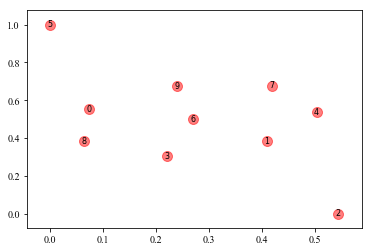

In [65]:
## network
import networkx as nx

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

pca_norm = make_pipeline(PCA(n_components=20), Normalizer(copy=False))

X_pca_norm = pca_norm.fit(X.toarray()).transform(X.toarray())

cor = squareform(pdist(X_pca_norm, metric="euclidean"))

G = nx.Graph()

for i in range(cor.shape[0]):
    for j in range(cor.shape[1]):
        if i == j:
            G.add_edge(i, j, {"weight":0})
        else:
            G.add_edge(i, j, {"weight":1.0/cor[i,j]})

edges = [(i, j) for i, j, w in G.edges(data=True) if w['weight'] > .8]
edge_weight=dict([((u,v,),int(d['weight'])) for u,v,d in G.edges(data=True)])

#pos = nx.graphviz_layout(G, prog="twopi") # twopi, neato, circo
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=100, alpha=.5)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=1)
#nx.draw_networkx_edge_labels(G, pos ,edge_labels=edge_weight)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

#plt.savefig("network")

#plt.close()

In [71]:
from gensim.models import word2vec

from sklearn.manifold import TSNE

model = word2vec.Word2Vec(data_l, size=100, window=20, min_count=200, workers=10)

In [72]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/misun/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


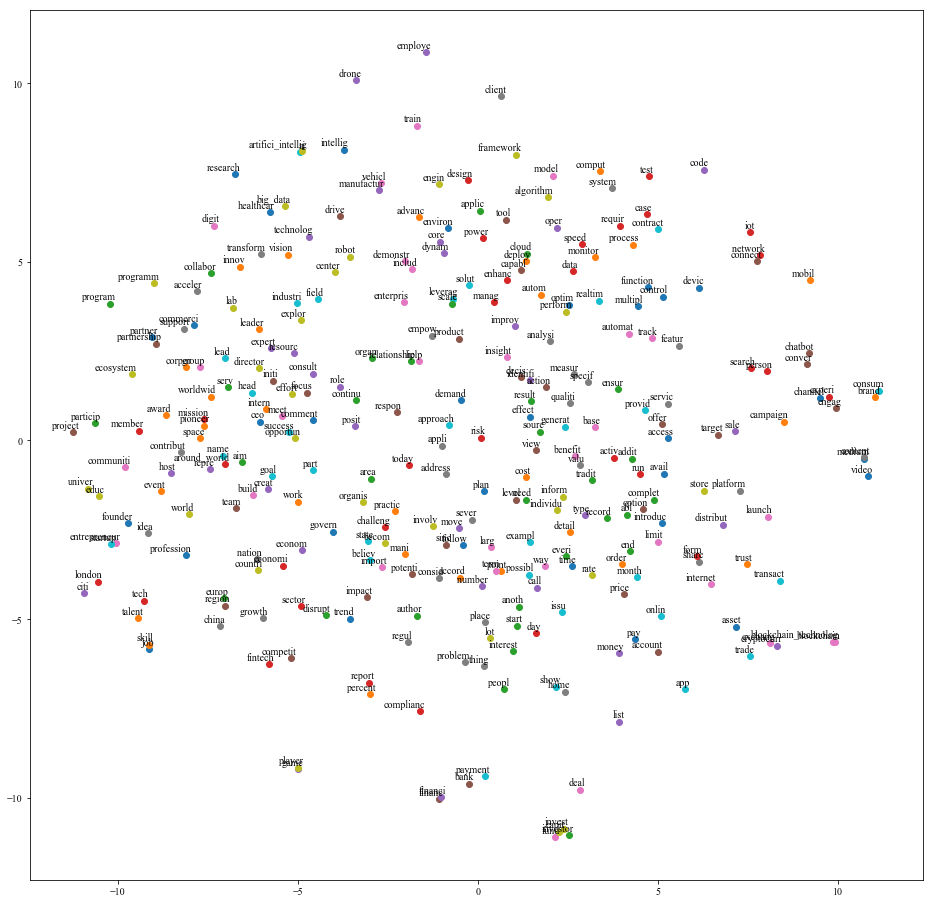

In [74]:
model1 = word2vec.Word2Vec(data_l, size=100, window=20, min_count=300, workers=10)
tsne_plot(model1)

In [79]:
# Load our word2vec model
import gensim
#w2v_model = gensim.models.word2vec.Word2Vec(data_l,
#                                            size=100, window=5,
#                                            min_count=1, workers=10)#gensim.models.word2vec.Word2Vec.load("model_name.bin")
w2v_model = model
print("Model loaded")

Model loaded


In [80]:
#Select 10000 words from our vocabulary
from __future__ import absolute_import, division, print_function
import numpy as np
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
word_list = []
i = 0
for word in w2v_model.vocab:
    word_vectors_matrix[i] = w2v_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

AttributeError: 'Word2Vec' object has no attribute 'vocab'